In [21]:
# Title: Exploratory Data Analysis of Car Sales Data

# Introduction
# In this notebook, we will perform exploratory data analysis (EDA) on a dataset of used cars in the US.
# The goal is to understand the data, handle missing values, and identify patterns and insights that can be useful for further analysis or modeling.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('vehicles_us.csv')

# Display the first few rows
df.head()

# Display the columns in the dataframe
print(df.columns)


Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')


In [22]:
# Summary statistics
df.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [24]:
# Data Preprocessing
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values for `paint_color` with 'Unknown'
df['paint_color'] = df['paint_color'].fillna('Unknown')

# Check if 'is_4WD' column exists before trying to fill missing values
if 'is_4WD' in df.columns:
    # Fill missing values for `is_4WD` with 0 (assuming missing values mean the vehicle is not 4WD)
    df['is_4WD'] = df['is_4WD'].fillna(0)

# Fill missing values for `model_year` with the median for the car model
if 'model_year' in df.columns:
    df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

# Fill missing values for `odometer` with the median for the manufacturer and model_year
if 'odometer' in df.columns and 'manufacturer' in df.columns and 'model_year' in df.columns:
    df['odometer'] = df['odometer'].fillna(df.groupby(['manufacturer', 'model_year'])['odometer'].transform('median'))

# Fill missing values for `cylinders` with the median for the manufacturer and model_year
if 'cylinders' in df.columns and 'manufacturer' in df.columns and 'model_year' in df.columns:
    df['cylinders'] = df['cylinders'].fillna(df.groupby(['manufacturer', 'model_year'])['cylinders'].transform('median'))

# Drop rows with remaining missing values
df = df.dropna()

# Data overview after preprocessing
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19499 entries, 0 to 51515
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19499 non-null  int64  
 1   model_year    19499 non-null  float64
 2   model         19499 non-null  object 
 3   condition     19499 non-null  object 
 4   cylinders     19499 non-null  float64
 5   fuel          19499 non-null  object 
 6   odometer      19499 non-null  float64
 7   transmission  19499 non-null  object 
 8   type          19499 non-null  object 
 9   paint_color   19499 non-null  object 
 10  is_4wd        19499 non-null  float64
 11  date_posted   19499 non-null  object 
 12  days_listed   19499 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 2.1+ MB


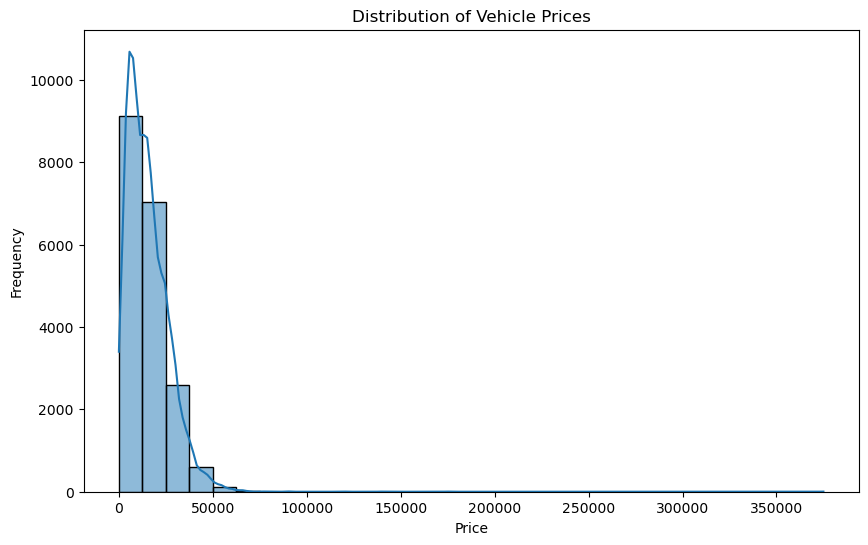

In [25]:
# Visualize the distribution of vehicle prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


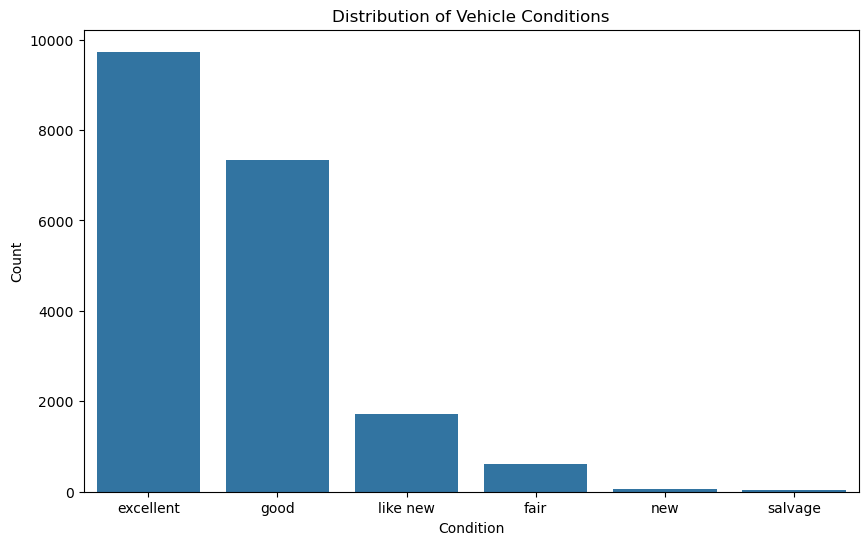

In [26]:
# Visualize the distribution of vehicle conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.title('Distribution of Vehicle Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


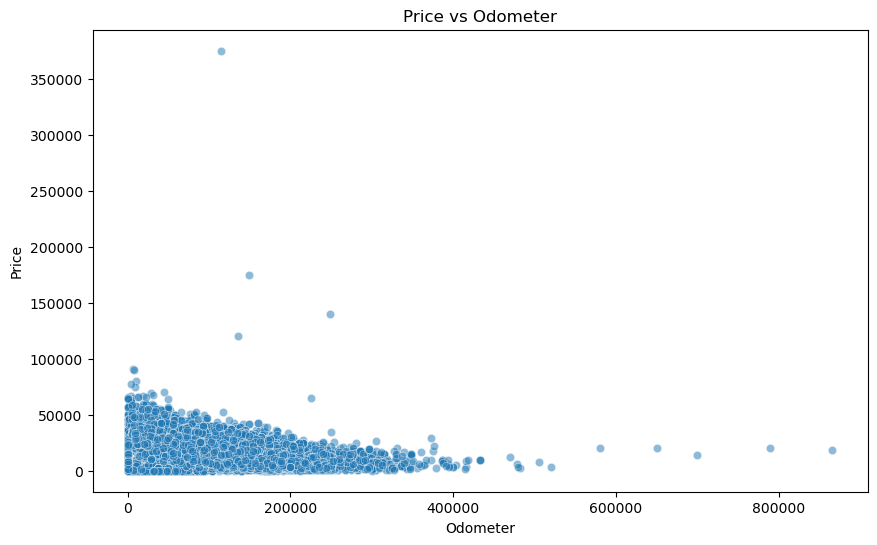

In [27]:
# Visualize the relationship between price and odometer reading
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5)
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()


In [28]:
# Save the cleaned dataset
df.to_csv('vehicles_us_cleaned.csv', index=False)

print("EDA and data preprocessing completed. Cleaned data saved to 'vehicles_us_cleaned.csv'.")


EDA and data preprocessing completed. Cleaned data saved to 'vehicles_us_cleaned.csv'.


Conclusion:


 Through this EDA, we have handled missing values by filling them with appropriate replacements, such as medians for groups or specific placeholders.
 We visualized the distribution of vehicle prices and conditions, and analyzed the relationship between price and odometer reading.
 These steps helped us better understand the data and prepare it for further analysis or modeling.
